In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
data=pd.read_csv(r"C:\Users\Micro\Downloads\AQI\khammam.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    84 non-null     object 
 1   AQI     84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index(data["Date"],inplace=True)
data.drop(["Date"],axis=1,inplace=True)

In [64]:
data.head()

,AQI
Date,
2016-01-01,47.0
2016-02-01,51.0
2016-03-01,54.0
2016-04-01,51.0
2016-05-01,47.0


In [65]:
original=data.copy()
data=data[:60]

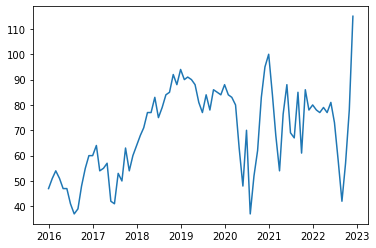

In [81]:
plt.plot(original)

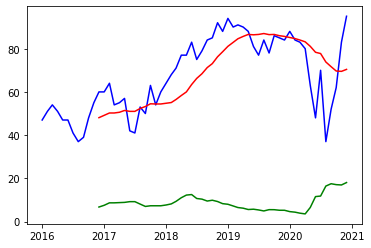

In [66]:
roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()
plt.plot(data,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

In [67]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data["AQI"])
print(dftest)

(-1.8660785656158976, 0.34818315353899887, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 352.6470591209451)


In [68]:
shift1=data.AQI-data.AQI.shift(1)
print(adfuller(shift1.dropna()))
shift1=pd.DataFrame(shift1)

(-9.237867653640343, 1.612105541908493e-15, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 346.9206703167099)


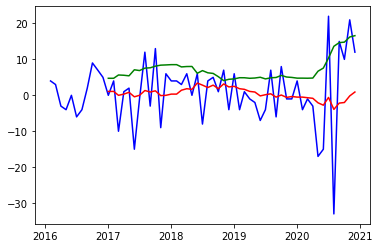

In [69]:
roll_mean = shift1.rolling(window=12).mean()
roll_std = shift1.rolling(window=12).std()
plt.plot(shift1,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

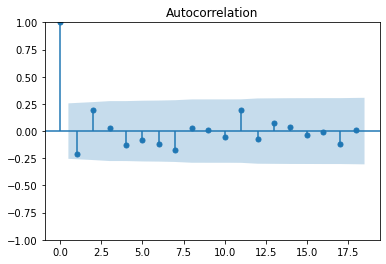

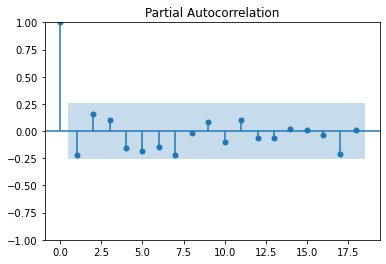

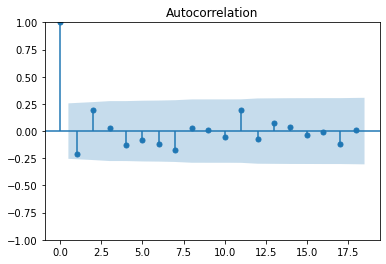

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(shift1.AQI.dropna())
plot_acf(shift1.AQI.dropna())

In [71]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,seasonal_order=(1,1,1,12)) 
model_fit = model.fit()

In [72]:
res=model_fit.forecast(24)
res

2021-01-01     80.971153
2021-02-01     78.311081
2021-03-01     80.368651
2021-04-01     78.405005
2021-05-01     57.856150
2021-06-01     47.856339
2021-07-01     72.891220
2021-08-01     28.669949
2021-09-01     51.301435
2021-10-01     58.480654
2021-11-01     89.042096
2021-12-01    101.665664
2022-01-01     85.866926
2022-02-01     82.273560
2022-03-01     82.201453
2022-04-01     79.515960
2022-05-01     61.438974
2022-06-01     47.956403
2022-07-01     70.877411
2022-08-01     34.472044
2022-09-01     51.788004
2022-10-01     60.931969
2022-11-01     84.833621
2022-12-01     97.022857
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'TESTING AQI-KHAMMAM')

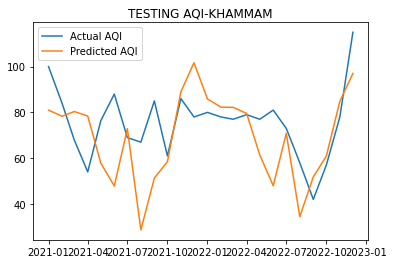

In [80]:
plt.plot(original[60:],label="Actual AQI")
plt.plot(res,label="Predicted AQI")
plt.legend()
plt.title("TESTING AQI-KHAMMAM")

In [79]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(original.AQI[60:].values,res)

0.1995144067658986

In [74]:
#res.to_csv(r"C:\Users\Micro\Downloads\AQI\aqipred_karimnagar.csv")
#use whole data